In [265]:
## Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [266]:
url = r'https://raw.githubusercontent.com/natthawit-jan/car_price_prediction_proj/master/Car_Purchasing_Data.csv'
df = pd.read_csv(url)

In [267]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [269]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Rename the column of gender to is_male, where 1 indicates male and female otherwise

In [270]:
df.rename(columns={'Gender': 'Is_Male'}, inplace=True)

In [271]:
df.head()

,Customer Name,Customer e-mail,Country,Is_Male,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


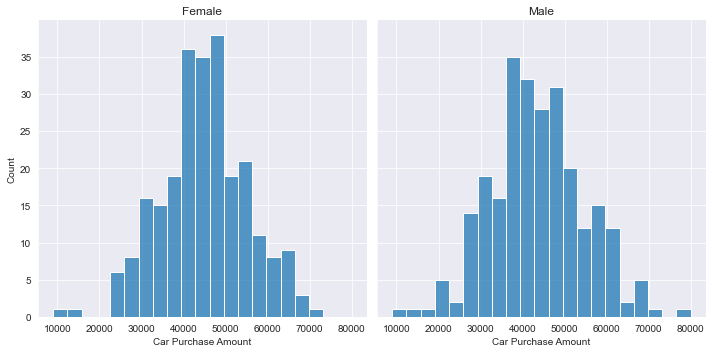

In [272]:
d = sns.displot(data=df, x="Car Purchase Amount", col="Is_Male",)
d.axes[0][0].set_title('Female')
d.axes[0][1].set_title('Male')
plt.show()

In [273]:
cols = [name for name in df.select_dtypes('number').columns if name != 'Car Purchase Amount']
P = df.corr().drop(columns=cols, index='Car Purchase Amount').T

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_25828/2546831319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  P = df.corr().drop(columns=cols, index='Car Purchase Amount').T


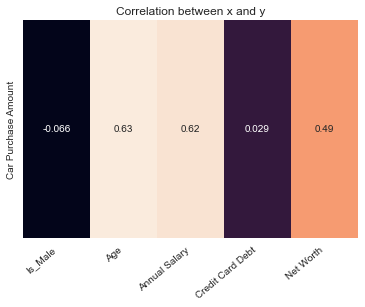

In [274]:
ax = sns.heatmap(P, annot=True, cbar=False)
ax.set_title('Correlation between x and y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

 Correlation between all dataset to see if X are related to each other (Multicorrlinearlity)

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_25828/1950817817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cbar=False, )


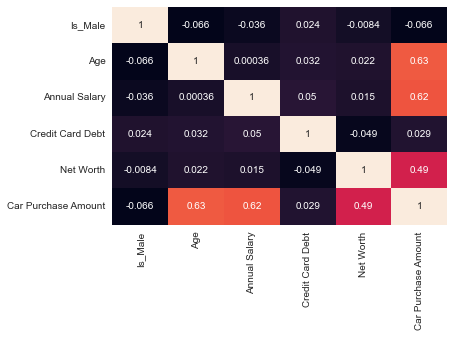

In [275]:
sns.heatmap(df.corr(), annot=True, cbar=False, )
plt.show()

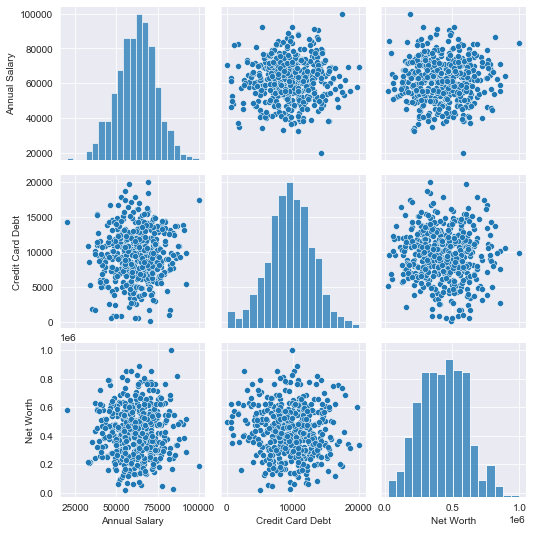

In [276]:
sns.pairplot(data=df.drop(columns=['Age', 'Is_Male', 'Car Purchase Amount']))

In [277]:
## Drop Country column since only USA is present
if 'Country' in df.columns:
    df.drop(columns='Country', inplace=True)
if 'Customer Name' in df.columns:
    df.drop(columns='Customer Name', inplace=True)

Choose to see the plots for only 3 looking-like linear feature (Age, Net Worth and Annual Salary)

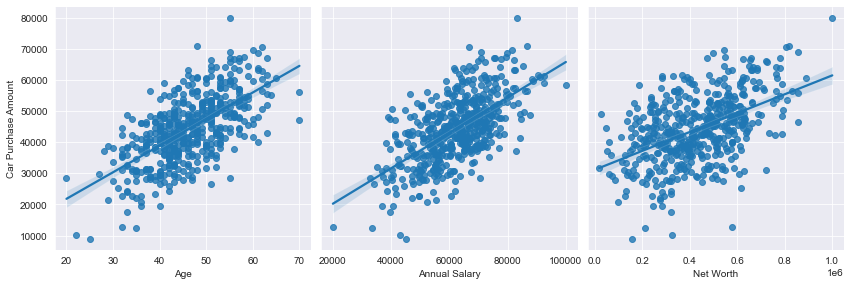

In [278]:
x_elements = ['Age', 'Annual Salary', 'Net Worth']
y_elements = 'Car Purchase Amount'
sns.pairplot(data=df, x_vars=x_elements, y_vars=y_elements, kind="reg", height=4, )

 Therefore, looking from the plots, we can see that there are mainly 3 features that look linear and can be used to train the model. *Age*, *Net Worth* and *Annual Salary*
 At first trial, we will include all the features to our model to see if this will give good results


Define X and y for the model

### Standardize the data

In [279]:
X = df[['Age', 'Annual Salary', 'Net Worth', 'Credit Card Debt', 'Is_Male']]
y = df[['Car Purchase Amount']]

Import sklearn preprocessing package to standardize data

In [280]:
from sklearn.preprocessing import StandardScaler

S = StandardScaler()
S.fit(X)
K = StandardScaler()
K.fit(y)

X = S.transform(X)
y = K.transform(y)


Divide the data into train and test data. We'll use 70% for the train dataset and 30% for the test dataset.

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Create a linear regression model and fit the data with the train dataset

In [282]:
model = LinearRegression()

In [283]:
model.fit(X_train, y_train)

LinearRegression()

See beta 0 (intercept value for the regression equation)

In [284]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = [0.00031998]


See the rest of coefficients (b1, b2, b3)

In [285]:
Y = S.feature_names_in_
for ind, coeff in enumerate(model.coef_.T):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1


The value of b(1, 'Age') = [0.62193075]
The value of b(2, 'Annual Salary') = [0.61221161]
The value of b(3, 'Net Worth') = [0.46640917]
The value of b(4, 'Credit Card Debt') = [0.00249961]
The value of b(5, 'Is_Male') = [0.00062451]


Now, we test our model with the test data

In [286]:
y_pred = model.predict(X_train)

Calculate the mean error for the *train* data

In [287]:
print('MAE:', mean_absolute_error(y_train, y_pred))
print('MSE:', mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))

MAE: 0.019535425293813392
MSE: 0.0005047232338919698
RMSE: 0.022466046245211233


$ R^2 $ Calculation

In [288]:
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.9994111755970159


Calculate the mean error for the *test* data

In [289]:
y_pred = model.predict(X_test)

In [290]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.018844119670014533
MSE: 0.000497456238323795
RMSE: 0.022303727005229305


In [291]:
X_train = pd.DataFrame(X_train)
X_train.columns = S.feature_names_in_
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.438e+05
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:02:57   Log-Likelihood:                 831.88
No. Observations:                 350   AIC:                            -1652.
Df Residuals:                     344   BIC:                            -1629.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0003      0.001      0.264      0.792      -0.002       0.003
Age                  0.6219      0.001    509.849      0.000       0.620       0.624
Annual Salary        0.6122      0.001    483.852      0.000       0.610       0.615
Net Worth            0.4664      0.001    385.821      0.000       0.464       0.469
Credit Card Debt     0.0025      0.001      2.038      0.042    8.74e-05       0.005
Is_Male              0.0006      0.001      0.514      0.608      -0.002       0.003
==============================================================================
Omnibus:                      180.787   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.762
Skew:                          -0.071   Prob(JB):                     3.10e-05
Kurtosis:                       1.815   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary above, we can say that credit card debt and gender features doesn't impact the car price that much, since the graph doesn't look linear and the t scores are close to 0 and p values are greater than the alpha ( 0.05 ). Thus, there are NOT statistically significant for the model.

We create another model where we take out credit debt and gender feature.

In [292]:
X = df[['Age', 'Annual Salary', 'Net Worth']]
y = df[['Car Purchase Amount']]


In [293]:
S = StandardScaler()
S.fit(X)
K = StandardScaler()
K.fit(y)

X = S.transform(X)
y = K.transform(y)


In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [295]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [296]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = [-1.76539692e-05]


In [297]:
Y = S.feature_names_in_

for ind, coeff in enumerate(model.coef_.T):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1

The value of b(1, 'Age') = [0.62331396]
The value of b(2, 'Annual Salary') = [0.61066607]
The value of b(3, 'Net Worth') = [0.46502029]


In [298]:
y_pred = model.predict(X_train)

Calculate Mean Error on the *train* data

In [299]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.019588863992737623
MSE: 0.0005052687017294752
RMSE: 0.02247818279420014


$ R^2 $ calculation

In [300]:
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.9995228971105041


Calculate Mean Error on the *test* data

In [301]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.018952159638714532
MSE: 0.0005014097569210076
RMSE: 0.02239218070936834


In [302]:
X_train = pd.DataFrame(X_train)
X_train.columns = S.feature_names_in_
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.231e+05
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:02:57   Log-Likelihood:                 831.70
No. Observations:                 350   AIC:                            -1655.
Df Residuals:                     346   BIC:                            -1640.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.765e-05      0.001     -0.015      0.988      -0.002       0.002
Age               0.6233      0.001    519.762      0.000       0.621       0.626
Annual Salary     0.6107      0.001    507.441      0.000       0.608       0.613
Net Worth         0.4650      0.001    378.320      0.000       0.463       0.467
==============================================================================
Omnibus:                      224.017   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.759
Skew:                          -0.050   Prob(JB):                     1.88e-05
Kurtosis:                       1.783   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""